**Step 1: Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Step 2: Load data**

In [5]:
df = pd.read_csv('4.netflix.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


**Step 3: Data Cleaning**

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['director', 'country'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

**Step 4: EDA & Visualization**

**1. Content Type Distribution**

/tmp/ipython-input-2950487008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


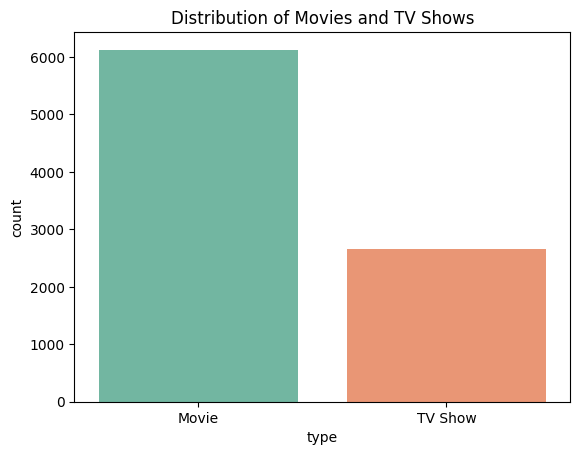

In [9]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Movies and TV Shows")
plt.show()

**2. Ratings Distribution**

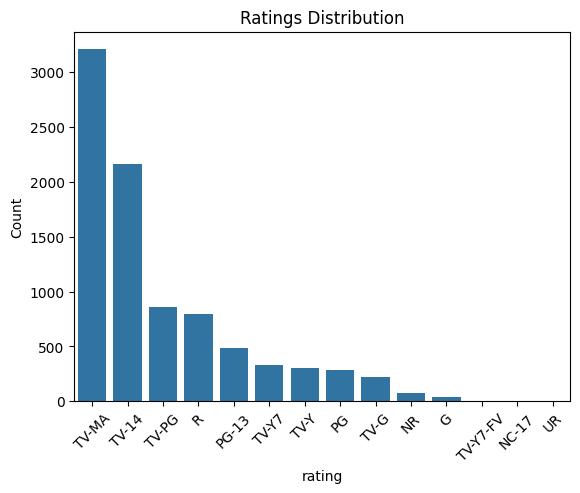

In [10]:
ratings = df['rating'].value_counts()
sns.barplot(x=ratings.index, y=ratings.values)
plt.xticks(rotation=45)
plt.title("Ratings Distribution")
plt.ylabel("Count")
plt.show()

**3. Content Over the Years**

/tmp/ipython-input-2195730742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


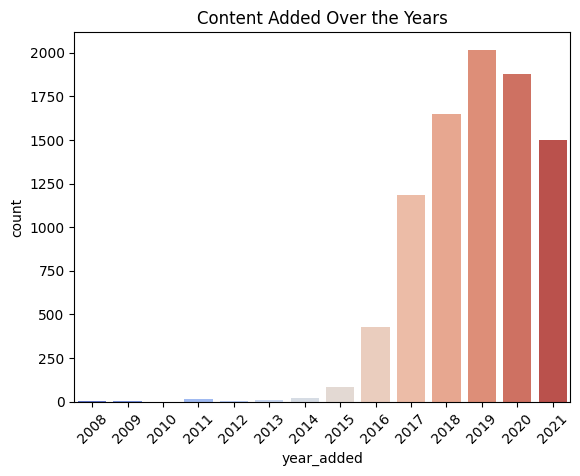

In [11]:
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title("Content Added Over the Years")
plt.xticks(rotation=45)
plt.show()

**4. Top 10 Countries**

/tmp/ipython-input-2294339281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


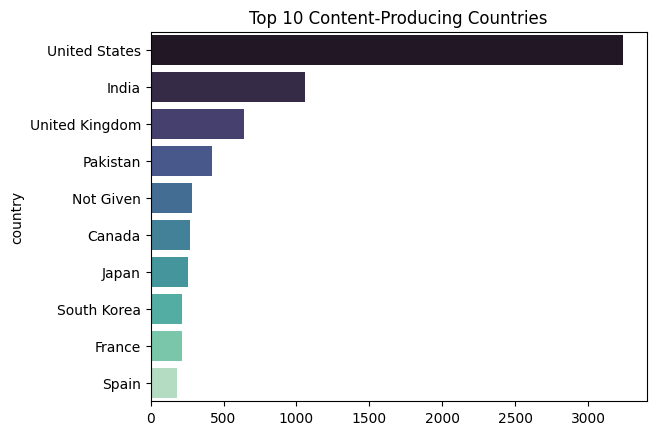

In [12]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title("Top 10 Content-Producing Countries")
plt.show()

**5. Monthly Releases**

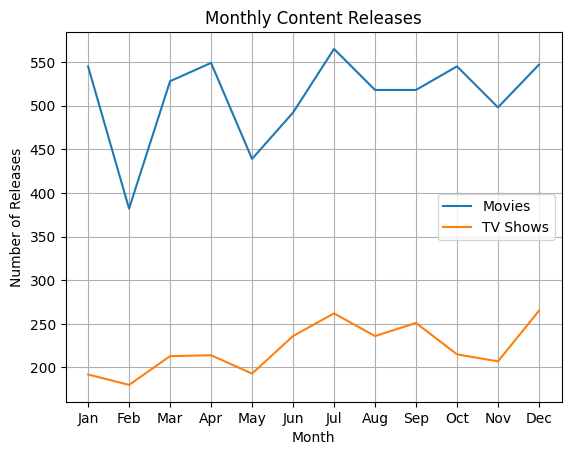

In [13]:
movies = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
tvshows = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.plot(movies.index, movies.values, label='Movies')
plt.plot(tvshows.index, tvshows.values, label='TV Shows')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Content Releases")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid(True)
plt.show()

**6.Word Cloud of Titles**

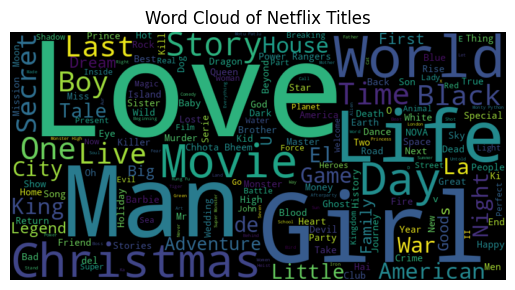

In [14]:
text = " ".join(df['title'].dropna())
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Titles")
plt.show()

**✅ Conclusion:**
This EDA lays the foundation for further steps like feature engineering, recommendation systems, or interactive dashboards in tools like Power BI or Tableau.